# Проект: Линейные модели в машинном обучении

**Описание данных**

1. Файл **ferma_main.csv** содержит данные о стаде фермера на текущий момент.   

Описание данных: 
- id — уникальный идентификатор коровы.
- Удой, кг — масса молока, которую корова даёт в год (в килограммах).
- ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.
- Сырой протеин, г — содержание сырого протеина в корме (в граммах).
- СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.
- Порода — порода коровы.
- Тип пастбища — ландшафт лугов, на которых паслась корова.
- порода папы_быка — порода папы коровы.
- Жирность,% — содержание жиров в молоке (в процентах).  
- Белок,% — содержание белков в молоке (в процентах).
- Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
- Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

Признаки в датасете **ferma_main.csv** можно разделить на группы:  
- Характеристики коровы: *id, Порода, порода папы_быка, Возраст.*
- Характеристики корма: *ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г, СПО (Сахаро-протеиновое соотношение).*
- Характеристика пастбища: *Тип пастбища.*
- Характеристики молока: *Удой, кг, Жирность,%, Белок,%, Вкус молока.*

2. Файл **ferma_dad.csv** хранит имя папы каждой коровы в стаде фермера. 

Описание данных: 

- id — уникальный идентификатор коровы.
- Имя Папы — имя папы коровы.  

3. Файл **cow_buy.csv** — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. 

Описание данных: 

- Порода — порода коровы.
- Тип пастбища — ландшафт лугов, на которых паслась корова.
- порода папы_быка — порода папы коровы.
- Имя_папы — имя папы коровы.
- Текущая_жирность,% — содержание жиров в молоке (в процентах).
- Текущий_уровень_белок,% — содержание белков в молоке (в процентах).
- Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

## Шаг 1. Загрузка и изучение данных

In [1]:
! pip install plotly -q
! pip install phik -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import sklearn

import phik
import plotly
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (r2_score, mean_squared_error, mean_absolute_error,
                             accuracy_score, confusion_matrix, precision_score, recall_score)

### Загрузим данные в датафреймы pandas:

In [2]:
try:
    ferma_main = pd.read_csv('C:/Users/zephy/#Machine_learning_project_1/ferma_main.csv', sep=';')
    ferma_dad = pd.read_csv('C:/Users/zephy/#Machine_learning_project_1/ferma_dad.csv', sep=';')
    cow_buy = pd.read_csv('C:/Users/zephy/#Machine_learning_project_1/cow_buy.csv', sep=';')
except:
    ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep=';')
    ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
    cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';')   

In [3]:
# Убедимся, что данные прочитаны корректно:

display(ferma_main.head())
display(ferma_dad.head())
display(cow_buy.head())

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


### Изучим данные.

**ferma_main**

In [4]:
ferma_main.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


In [5]:
ferma_main.columns

Index(['id', 'Удой, кг', 'ЭКЕ (Энергетическая кормовая единица)',
       'Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)', 'Порода',
       'Тип пастбища', 'порода папы_быка', 'Жирность,%', 'Белок,%',
       'Вкус молока', 'Возраст'],
      dtype='object')

In [6]:
# переименуем названия столбцов:

ferma_main = ferma_main.rename(columns={"Удой, кг": "milk_yield",
                                        "ЭКЕ (Энергетическая кормовая единица)": "energy_feed_unit",
                                        "Сырой протеин, г": "crude_protein",
                                        "СПО (Сахаро-протеиновое соотношение)": "sugar_protein_ratio",
                                        "Порода": "breed",
                                        "Тип пастбища": "pasture_type",
                                        "порода папы_быка": "daddy_bull_breed",
                                        "Жирность,%": "fat_content",
                                        "Белок,%": "protein",
                                        "Вкус молока": "taste_of_milk",
                                        "Возраст": "age"})

In [7]:
# вывод общей информации о датафрейме:

ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   634 non-null    int64 
 1   milk_yield           634 non-null    int64 
 2   energy_feed_unit     634 non-null    object
 3   crude_protein        634 non-null    int64 
 4   sugar_protein_ratio  634 non-null    object
 5   breed                634 non-null    object
 6   pasture_type         634 non-null    object
 7   daddy_bull_breed     634 non-null    object
 8   fat_content          634 non-null    object
 9   protein              634 non-null    object
 10  taste_of_milk        634 non-null    object
 11  age                  634 non-null    object
dtypes: int64(3), object(9)
memory usage: 59.6+ KB


634 строки, 12 столбцов. Пропусков нет.   
В дальнейшем значения 'energy_feed_unit', 'sugar_protein_ratio', 'fat_content' и 'protein' следует привести к численному типу данных.

**ferma_dad**

In [8]:
ferma_dad.head()

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [9]:
ferma_dad.columns

Index(['id', 'Имя Папы'], dtype='object')

In [10]:
# переименуем названия столбцов:

ferma_dad = ferma_dad.rename(columns={"Имя Папы": "dads_name"})

In [11]:
# вывод общей информации о датафрейме:

ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         629 non-null    int64 
 1   dads_name  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


629 строк, 2 столбца. Пропусков нет. Данные соответствуют типам.

**cow_buy**

In [12]:
cow_buy.head()

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


In [13]:
cow_buy.columns

Index(['Порода', 'Тип пастбища', 'порода папы_быка', 'Имя_папы',
       'Текущая_жирность,%', 'Текущий_уровень_белок,%', 'Возраст'],
      dtype='object')

In [14]:
# переименуем названия столбцов:

cow_buy = cow_buy.rename(columns={"Порода": "breed",
                                "Тип пастбища": "pasture_type",
                                 "порода папы_быка": "daddy_bull_breed",
                                 "Имя_папы": "dads_name",
                                 "Текущая_жирность,%": "fat_content",
                                 "Текущий_уровень_белок,%": "protein",
                                 "Возраст": "age"})

In [15]:
# вывод общей информации о датафрейме:

cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   breed             20 non-null     object
 1   pasture_type      20 non-null     object
 2   daddy_bull_breed  20 non-null     object
 3   dads_name         20 non-null     object
 4   fat_content       20 non-null     object
 5   protein           20 non-null     object
 6   age               20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


20 строк, 7 столбцов. Пропусков нет.   
В дальнейшем значения 'fat_content' и 'protein' следует привести к численному типу данных.

## Шаг 2. Предобработка данных

In [16]:
ferma_main.describe()

,id,milk_yield,crude_protein
count,634.000000,634.000000,634.000000
mean,317.460568,6187.025237,1922.682965
std,183.096982,1638.401021,182.392548
min,1.000000,5204.000000,1660.000000
25%,159.250000,5751.750000,1772.250000
50%,317.500000,6130.500000,1880.500000
75%,475.750000,6501.000000,2058.750000
max,629.000000,45616.000000,2349.000000


Явно выбивается максимальное значение удоя молока - 45616 л!  
Изучим все возможные варианты показателя на предмет выбросов:

In [17]:
ferma_main['milk_yield'].unique()

array([ 5863,  5529,  5810,  5895,  5302,  5254,  5910,  6179,  6783,
        5339,  5591,  6563,  6173,  6131,  6014,  6518, 45616,  5777,
        6461,  5698,  6752,  6278,  6244,  6320,  5372,  6365,  6051,
        7028,  6159,  6672,  5242,  6674,  6930,  6837,  5356,  6401,
        6150,  6016,  5702,  6303,  6400,  6581,  6033,  5888,  7061,
        5796,  7173,  6561,  6370,  6876,  5593,  6353,  5517,  5378,
        5383,  5492,  5643,  6601,  6274,  6697,  6924,  5639,  6564,
        6073,  6559,  6163,  6006,  5940,  5565,  7222,  5809,  5718,
        5381,  5281,  6865,  5871,  6037,  5813,  5640,  6618,  6474,
        6240,  6686,  6398,  5564,  6153,  5533,  5776,  6572,  6036,
        5931,  6372,  6403,  6976,  6267,  6262,  6059,  6724,  6013,
        6248,  5700,  6750,  5417,  6392,  5617,  6414,  6763,  6862,
        6345,  5601,  5412,  6576,  5442,  5998,  5882,  5784,  6350,
        6109,  6605,  6209,  6232,  6623,  6463,  5692,  6607,  5906,
        6730,  6162,

Похоже, что это единственный аномальный случай. Найдем эту строку и рассмотрим ее детально:

In [18]:
ferma_main.query('milk_yield == 45616')

,id,milk_yield,energy_feed_unit,crude_protein,sugar_protein_ratio,breed,pasture_type,daddy_bull_breed,fat_content,protein,taste_of_milk,age
16,17,45616,"11,5",1675,"0,93",Вис Бик Айдиал,Холмистое,Айдиалл,"3,22","3,076",вкусно,более_2_лет


Строка с индексом "16" - удаляем из df.

In [19]:
ferma_main = ferma_main[ferma_main['milk_yield'] < 40000].reset_index(drop=True)

In [20]:
# поиск явных дубликатов:

ferma_main.duplicated().sum()

5

In [21]:
ferma_main[ferma_main.duplicated() == True]

,id,milk_yield,energy_feed_unit,crude_protein,sugar_protein_ratio,breed,pasture_type,daddy_bull_breed,fat_content,protein,taste_of_milk,age
628,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
629,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
630,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
631,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
632,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет


5 дубликатов относятся к id 627. Очистим датафрейм от них.

In [22]:
ferma_main = ferma_main.drop_duplicates()

In [23]:
ferma_main = ferma_main.reset_index(drop=True)

Приведем числовые данные к соответствующему формату: 

In [24]:
list_to_float = ['energy_feed_unit', 'sugar_protein_ratio', 'fat_content', 'protein']

for i in list_to_float:
# Изучим значения данных в столбцах:
    print(ferma_main[i].unique())
    
# Приведем значения от типа данных 'object' к численному типу 'float':
    ferma_main[i] = ferma_main[i].str.replace(',', '.')
    ferma_main[i] = ferma_main[i].astype(float)

['14,2' '12,8' '14' '12,4' '12,7' '13,2' '14,7' '13,4' '13,7' '16,5'
 '15,4' '14,5' '16' '15,6' '15,7' '14,3' '15,5' '14,6' '15,9' '15,2'
 '14,8' '16,4' '11,8' '14,4' '16,1' '12,9' '13,8' '13,3' '16,3' '13,9'
 '14,1' '16,7' '15,8' '16,2' '12,2' '14,9' '13,6' '12,5' '16,8' '13,5'
 '15,1' '12,1' '16,6' '15,3' '13,1' '12,3' '11,9' '12,6' '15' '13' '12'
 '11,1' '11,7' '10,9']
['0,89' '0,885' '0,93' '0,94' '0,895' '0,95' '0,96' '0,85' '0,84' '0,86'
 '0,88' '0,9']
['3,58' '3,54' '3,59' '3,4' '3,73' '3,13' '3,48' '3,55' '3,71' '3,72'
 '3,61' '3,03' '3,49' '3,31' '3,7' '3,74' '3,21' '3,11' '3,25' '3,34'
 '3,24' '3,53' '3,16' '3,26' '3,57' '3,44' '3,38' '3,18' '3,42' '3,62'
 '3,75' '3,41' '3,27' '3,63' '3,12' '3,64' '3,69' '3,22' '3,37' '3,65'
 '3,33' '3,28' '3,35' '3,32' '3,23' '3,15' '3,01' '2,99' '3,39' '3,19']
['3,076' '3,079' '3,074' '3,075' '3,073' '3,078' '3,077' '3,071' '3,08'
 '3,072' '3,081' '3,082' '3,07' '3,069' '3,085']


In [25]:
# рассмотрим значения типа 'object' на предмет неявных дубликатов:

str_list = ['breed', 'pasture_type', 'daddy_bull_breed', 'taste_of_milk', 'age']

for i in str_list:
    print(ferma_main[i].unique())

['Вис Бик Айдиал' 'РефлешнСоверинг']
['Равнинное' 'Равнинные' 'Холмистое']
['Айдиал' 'Соверин' 'Айдиалл']
['вкусно' 'не вкусно']
['более_2_лет' 'менее_2_лет']


In [26]:
# выявлено два варианта описания одного значения "тип пастбища". Приводим к единому:

ferma_main['pasture_type'] = ferma_main['pasture_type'].replace(to_replace = {'Равнинные': 'равнинное',
                                                                              'Равнинное': 'равнинное',
                                                                              'Холмистое': 'холмистое'})
# проверка:

ferma_main['pasture_type'].unique()

array(['равнинное', 'холмистое'], dtype=object)

In [27]:
# также имеются повторы значения "порода папы быка". Лечим:

ferma_main['daddy_bull_breed'] = ferma_main['daddy_bull_breed'].str.replace('Айдиалл', 'Айдиал')

# проверка:

ferma_main['daddy_bull_breed'].unique()

array(['Айдиал', 'Соверин'], dtype=object)

In [28]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628 entries, 0 to 627
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   628 non-null    int64  
 1   milk_yield           628 non-null    int64  
 2   energy_feed_unit     628 non-null    float64
 3   crude_protein        628 non-null    int64  
 4   sugar_protein_ratio  628 non-null    float64
 5   breed                628 non-null    object 
 6   pasture_type         628 non-null    object 
 7   daddy_bull_breed     628 non-null    object 
 8   fat_content          628 non-null    float64
 9   protein              628 non-null    float64
 10  taste_of_milk        628 non-null    object 
 11  age                  628 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.0+ KB


В сухом остатке 628 строк. Данные соответствуют своему типу.

Поиск дубликатов для ferma_dad:

In [29]:
ferma_dad['dads_name'].unique()

array(['Буйный', 'Соловчик', 'Барин', 'Геркулес'], dtype=object)

In [30]:
ferma_dad.duplicated().sum()

0

Все поголовье произошло от четверых доноров.

Проверим данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой:

In [31]:
# Изучим уникальные значения данных в столбцах:
for i in cow_buy.columns:
    print(cow_buy[i].unique())

['Вис Бик Айдиал' 'РефлешнСоверинг']
['холмистое' 'равнинное']
['Айдиал' 'Соверин']
['Геркулес' 'Буйный' 'Барин' 'Соловчик']
['3,58' '3,54' '3,59' '3,4' '3,64' '3,63' '3,57' '3,73' '3,68' '3,42'
 '3,77' '3,34']
['3,076' '3,081' '3,074' '3,061' '3,053' '3,079' '3,055' '3,073' '3,046'
 '3,075' '3,065' '3,069']
['более_2_лет' 'менее_2_лет']


In [32]:
# Приведем значения типа данных 'object' к численному типу 'float':

list_to_float = ['fat_content', 'protein']

for i in list_to_float:
    cow_buy[i] = cow_buy[i].str.replace(',', '.')
    cow_buy[i] = cow_buy[i].astype(float)

In [33]:
cow_buy.duplicated().sum()

4

In [34]:
cow_buy = cow_buy.drop_duplicates().reset_index(drop=True)

In [35]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   breed             16 non-null     object 
 1   pasture_type      16 non-null     object 
 2   daddy_bull_breed  16 non-null     object 
 3   dads_name         16 non-null     object 
 4   fat_content       16 non-null     float64
 5   protein           16 non-null     float64
 6   age               16 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.0+ KB


Избавились от 4 дубликатов в датафрейме *cow_buy*, данные подготовлены к дальнейшей работе. 

## Шаг 3. Исследовательский анализ данных

**Анализ ferma_main**

Анализ числовых признаков:

In [36]:
# Создадим функцию для визуализации распределения числовых признаков:

def hist_num_plot(num_list, x_label_num_list, df):
    fig = plt.figure(figsize=(15,15))

    for idx, column in enumerate(num_list):
        fig.add_subplot(3, round(len(x_label_num_list)/3), idx + 1);
        ax = df[column].plot(kind="hist", title=column, bins=20);
        ax.set(xlabel=x_label_num_list[idx], ylabel='Частота')
        ax.set_title(f'График распрелеления {num_list[idx]}')
    plt.show()

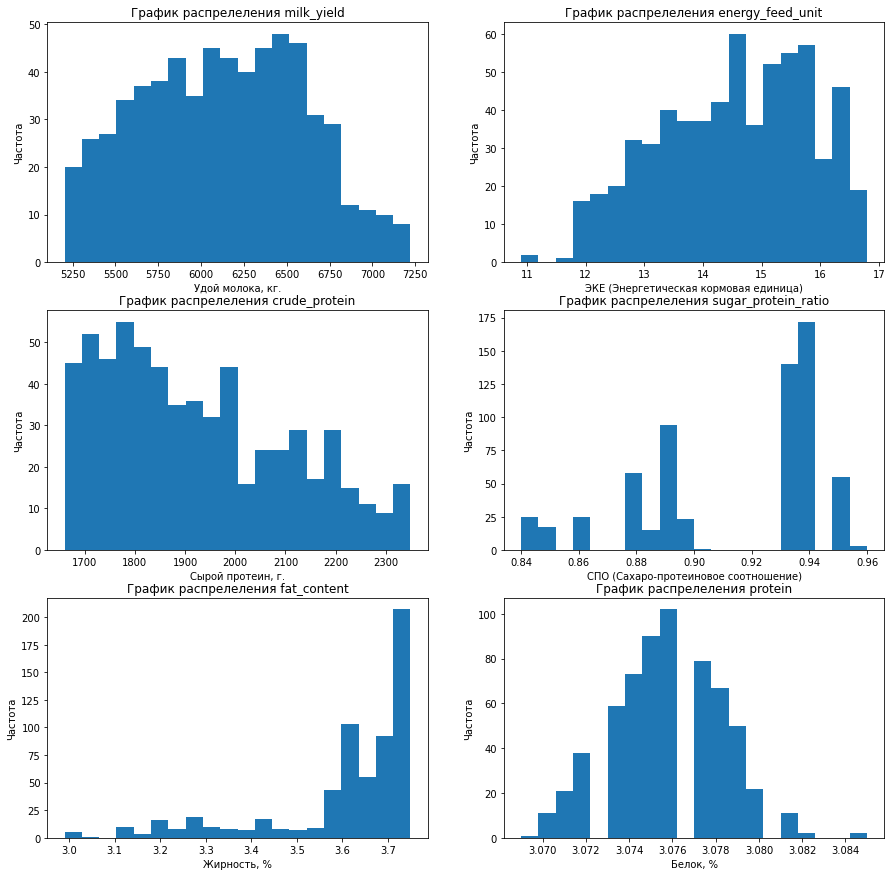

In [37]:
# Создадим перечень числовых признаков в ferma_main:

num_list_ferma_main = ['milk_yield', 'energy_feed_unit', 'crude_protein', 'sugar_protein_ratio', 'fat_content', 'protein']

# Перечень заголовков графиков:

x_label_num_list_ferma_main = ['Удой молока, кг.', 'ЭКЕ (Энергетическая кормовая единица)', 'Сырой протеин, г.',
                               'СПО (Сахаро-протеиновое соотношение)', 'Жирность, %', 'Белок, %']

# Построим гистограммы распределения значений:

hist_num_plot(num_list_ferma_main, x_label_num_list_ferma_main, ferma_main)

In [38]:
# Создадим функцию для визуализации распределения значений типа "Ящик с усами":

def hist_num_boxplot(num_list, x_label_num_list, df):
    fig  = plt.figure(figsize=(15,15))

    for idx, column in enumerate(num_list):
        ax = fig.add_subplot(3, round(len(x_label_num_list)/3), idx + 1);
        ax.boxplot(df[column]); 
        ax.set_ylabel(x_label_num_list[idx], fontsize=8);
        ax.set_title(f'Диаграмма размаха "Ящик с усами" для {num_list[idx]}')
    plt.show()

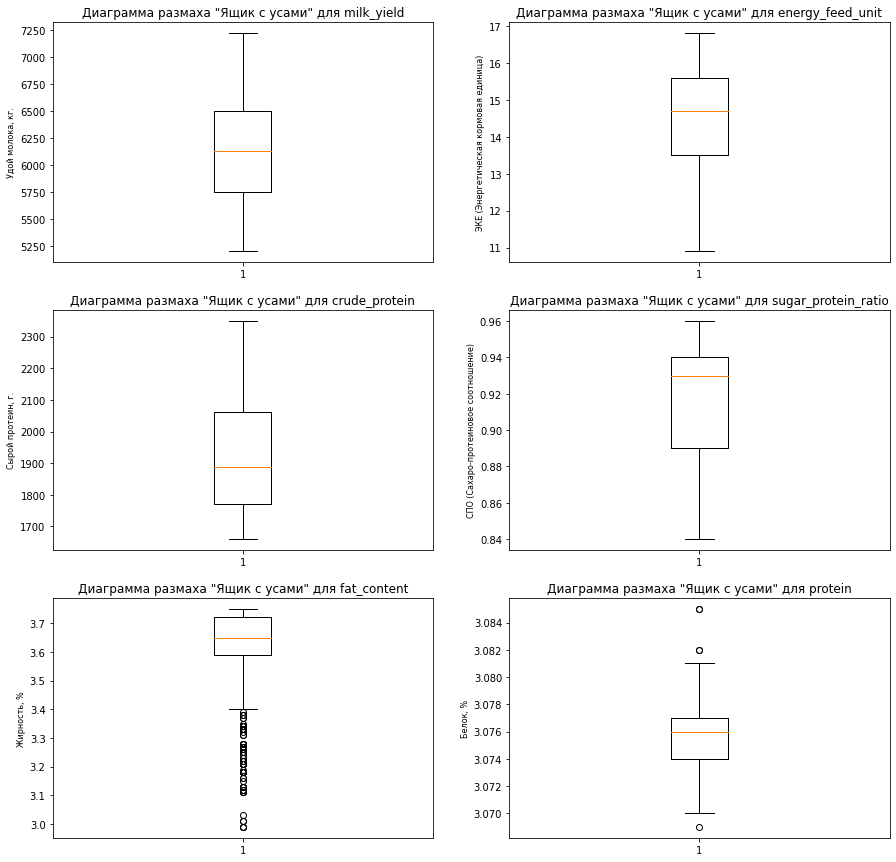

In [39]:
# Построим диаграмма размаха значений числовых признаков:

hist_num_boxplot(num_list_ferma_main, x_label_num_list_ferma_main, ferma_main)

In [40]:
# Определим доли выбросов:

trash_protein = ferma_main['protein'].loc[(ferma_main['protein']<3.07) | (ferma_main['protein']>3.081)].count()
all_protein = len(ferma_main['protein'])
trash_protein_part = trash_protein / all_protein
print('Выбросов:', trash_protein)
print(f'Доля выбросов в значениях признака "белок": {trash_protein_part:.2%}')

trash_fat_content = ferma_main['fat_content'].loc[ferma_main['fat_content']<3.4].count()
all_fat_content = len(ferma_main['fat_content'])
trash_fat_content_part = trash_fat_content / all_fat_content
print('Выбросов:', trash_fat_content)
print(f'Доля выбросов в значениях признака "жирность": {trash_fat_content_part:.2%}')

Выбросов: 5
Доля выбросов в значениях признака "белок": 0.80%
Выбросов: 86
Доля выбросов в значениях признака "жирность": 13.69%


- Доля выбросов признака "белок" составляет менее 1%, можно удалить выбивающиеся значения.  
- В случае с признаком "жирность", доля выбросов около 14% - при очистке от них массива произойдет сильное искажение в данных.   
Вместе с тем, значения жирности визуально можно разделить на три подгруппы: до 3.6%, более 3.6% и менее 3.7%, более 3.7%. 

In [41]:
# Очистка датафрейма от выбросов

ferma_main = ferma_main.loc[ferma_main['protein']>=3.07]
ferma_main = ferma_main.loc[ferma_main['protein']<=3.081]          

ferma_main.shape

(623, 12)

Выводы:  
- распределения значений удоя и питательности корма коровы выглядят нормальными;
- данные СПО неравномерны, заметен "провал" в зоне значения 0.92;
- жирность основной доли удоя составляет 3.6 - 3.75 %.

Анализ категориальных признаков.

In [42]:
# Создадим функцию для визуализации распределения категориальных признаков:

def pie_cat_plot(cat_list, x_label_cat_list, df):
    fig = plt.figure(figsize=(15,15))

    for idx, column in enumerate(cat_list):
        fig.add_subplot(3, 2, idx + 1);
        ax = df[column].value_counts().plot(kind="pie",
                                            colors=['r', 'c', 'g', 'y'], 
                                            autopct='%1.2f%%',
                                            startangle=90,
                                            );
        ax.set(xlabel='Доли от всего стада', ylabel='', title=x_label_cat_list[idx])
    

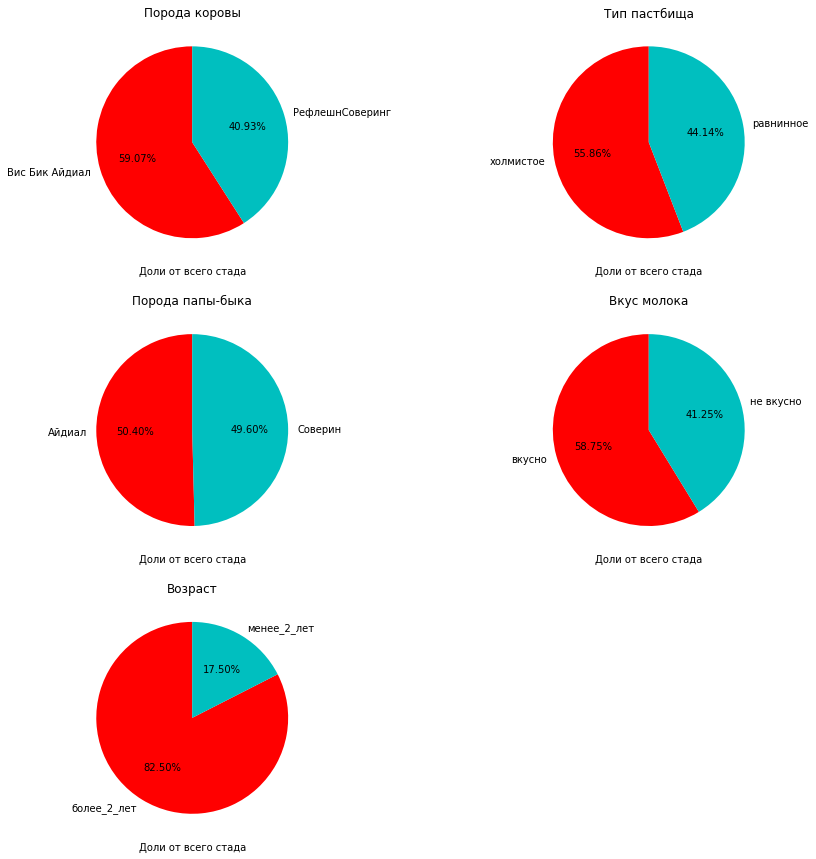

In [43]:
cat_list_ferma_main = ['breed' , 'pasture_type', 'daddy_bull_breed', 'taste_of_milk', 'age']

x_label_cat_list_ferma_main = ['Порода коровы', 'Тип пастбища', 'Порода папы-быка', 'Вкус молока', 'Возраст']

pie_cat_plot(cat_list_ferma_main, x_label_cat_list_ferma_main, ferma_main)

Можно сделать следующие выводы:  
- стадо состоит на 59 % из коров породы Вис Бик Айдиал и на 41 % - Рефлешн Соверинг;
- отцами всех коров в стаде почти в равной степени являются представители обеих пород;  
- немногим более половины коров (56 %) пасутся на холмистых пастбищах;
- вкусного молока получается на 44 % больше, чем не вкусного;
- на каждые 6 зрелых коров приходится одна молодая возрастом до 2 лет.  

**Анализ ferma_dad**

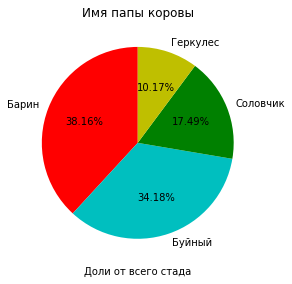

In [44]:
# Здесь всего два столбца, рассмотрим распределение "по отцам":

cat_list_ferma_dad = ['dads_name']

x_label_cat_list_ferma_dad = ['Имя папы коровы']

pie_cat_plot(cat_list_ferma_dad, x_label_cat_list_ferma_dad, ferma_dad)

От быков Барин и Буйный произошло более 70% стада.

**Анализ *cow_buy***

In [45]:
cow_buy.head()

,breed,pasture_type,daddy_bull_breed,dads_name,fat_content,protein,age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


Анализ числовых признаков:

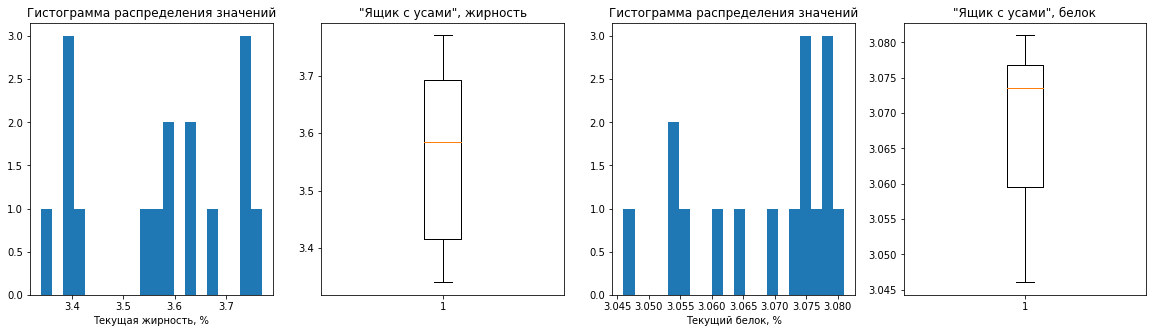

In [46]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20,5))

axs[0].hist(cow_buy['fat_content'], bins=20);
axs[0].set_xlabel('Текущая жирность, %')
axs[0].set_title('Гистограмма распределения значений')
axs[1].boxplot(cow_buy['fat_content']);
axs[1].set_title('"Ящик с усами", жирность')
axs[2].hist(cow_buy['protein'], bins=20);
axs[2].set_xlabel('Текущий белок, %')
axs[2].set_title('Гистограмма распределения значений')
axs[3].boxplot(cow_buy['protein']);
axs[3].set_title('"Ящик с усами", белок');

- Значения выглядят адекватными.   
- Есть 1 выброс в категории "белок", но избавляться от него не станем - датафрейм слишком мал, к тому же значение аномалии не сильно выбивается из общей картины.

Анализ категориальных признаков:

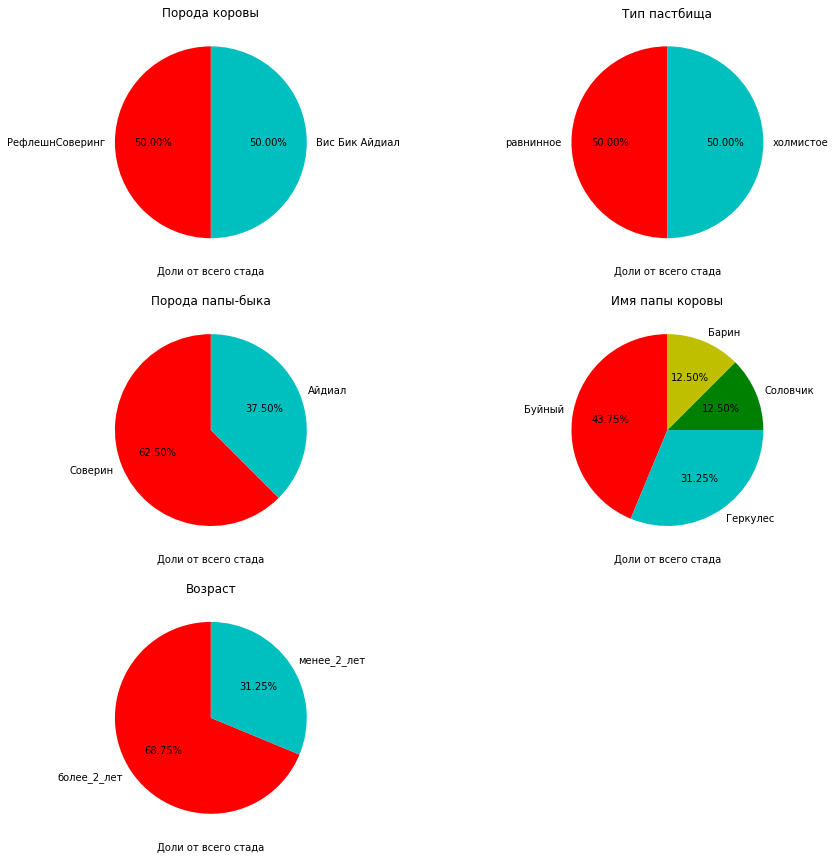

In [47]:
cat_list_cow_buy = ['breed', 'pasture_type', 'daddy_bull_breed', 'dads_name', 'age']

x_label_cat_list_cow_buy = ['Порода коровы', 'Тип пастбища', 'Порода папы-быка', 'Имя папы коровы', 'Возраст']

pie_cat_plot(cat_list_cow_buy, x_label_cat_list_cow_buy, cow_buy)

**Выводы**  

*ferma_main*  
Из 634 изначальных значений в датафрейме осталось 623 (11 были удалены) - потери составили менее 2%, что вполне приемлемо.  
13.5% выбросов в столбце "жирность", удалять не будем.  
Вкусное молоко к невкусному имеет соотношение 3:2.

*ferma_dad*  
Представлен 4 донорами, из которых Барин и Буйный являются отцами более чем 70% всего поголовья.   

*cow_buy*  
За исключением признака "имя папы коровы" остальные категориальные признаки - бинарные.
Отношение молодых коров к зрелым - 1:4.


## Шаг 4. Корреляционный анализ признаков в датасете *ferma_main.csv*

### 1. Изучим взаимосвязь между признаками: рассчитаем коэффициенты корреляции между всеми признаками:

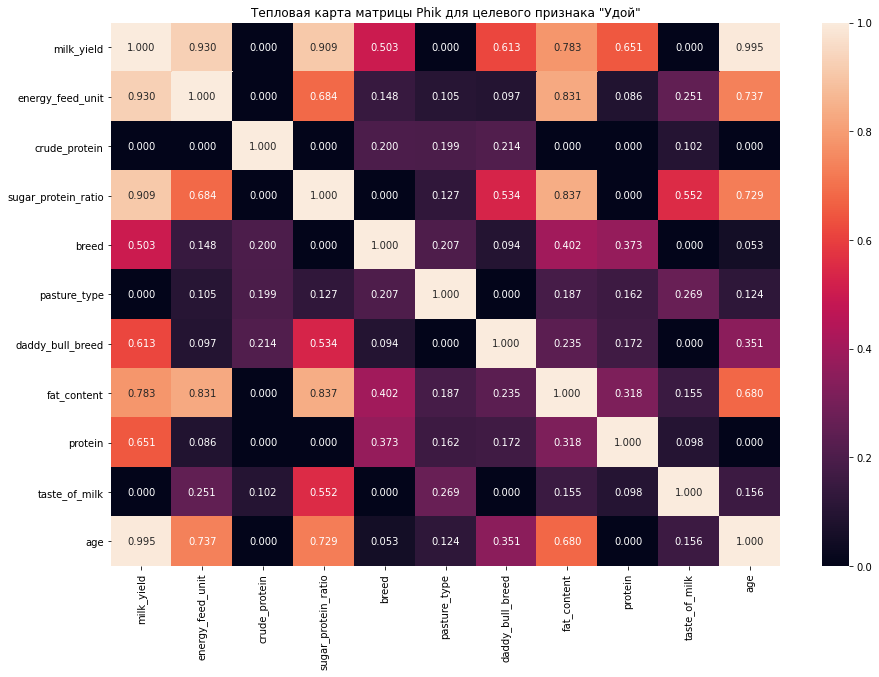

In [48]:
# Построение тепловой карты Phik для всех признаков

phik_matrix = phik.phik_matrix(ferma_main.drop('id', axis=1), interval_cols='all')
plt.figure(figsize=(15,10));
sns.heatmap(phik_matrix, annot=True, fmt='.3f')
plt.title('Тепловая карта матрицы Phik для целевого признака "Удой"');

Поскольку большинство признаков датасета распределены не нормально, вместо корреляции Пирсона используем корреляцию Спирмана.

In [49]:
# Матрица корреляции числовых признаков для *ferma_main*:

ferma_main.drop('id', axis=1).corr(method='spearman')

,milk_yield,energy_feed_unit,crude_protein,sugar_protein_ratio,fat_content,protein
milk_yield,1.000000,0.764683,0.437322,0.786345,0.687403,-0.007809
energy_feed_unit,0.764683,1.000000,0.383890,0.741703,0.686893,-0.017652
crude_protein,0.437322,0.383890,1.000000,0.488510,0.395221,0.224131
sugar_protein_ratio,0.786345,0.741703,0.488510,1.000000,0.699486,0.113700
fat_content,0.687403,0.686893,0.395221,0.699486,1.000000,0.048995
protein,-0.007809,-0.017652,0.224131,0.113700,0.048995,1.000000


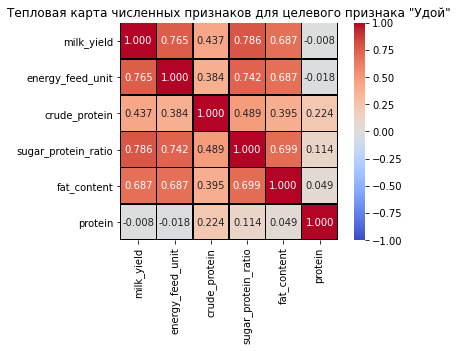

In [50]:
ax = sns.heatmap(ferma_main.drop('id', axis=1).corr(method='spearman'),
                 annot=True, fmt='.3f', vmin=-1, vmax=1, center= 0,
                 cmap='coolwarm', linewidths=0.5, linecolor='black',
                 square=True);
ax.set(title='Тепловая карта численных признаков для целевого признака "Удой"');

Наибольшее значение коэффициента корреляции с целевым признаком *Удой* наблюдается у показателей корма коровы:  

- *ЭКЕ (Энергетическая кормовая единица)* r = 0.77,  
- *СПО (Сахаро-протеиновое соотношение)* r = 0.79.  

У сырого протеина в корме и жирности молока с "Удоем" средняя корреляция.  
Наличие белка в молоке никак не зависит от удоя.

In [51]:
ferma_main['energy_feed_unit'].corr(ferma_main['sugar_protein_ratio'])

0.7503190973502468

Взаимная корреляция между ЭКЕ и СПО не составляет 75 %.   
Можно полагать, что мультиколлениарность между входными признаками отсутствует.

### 2. Построим диаграммы рассеяния для признака Удой, кг и всех количественных признаков с учётом значения категориальных признаков

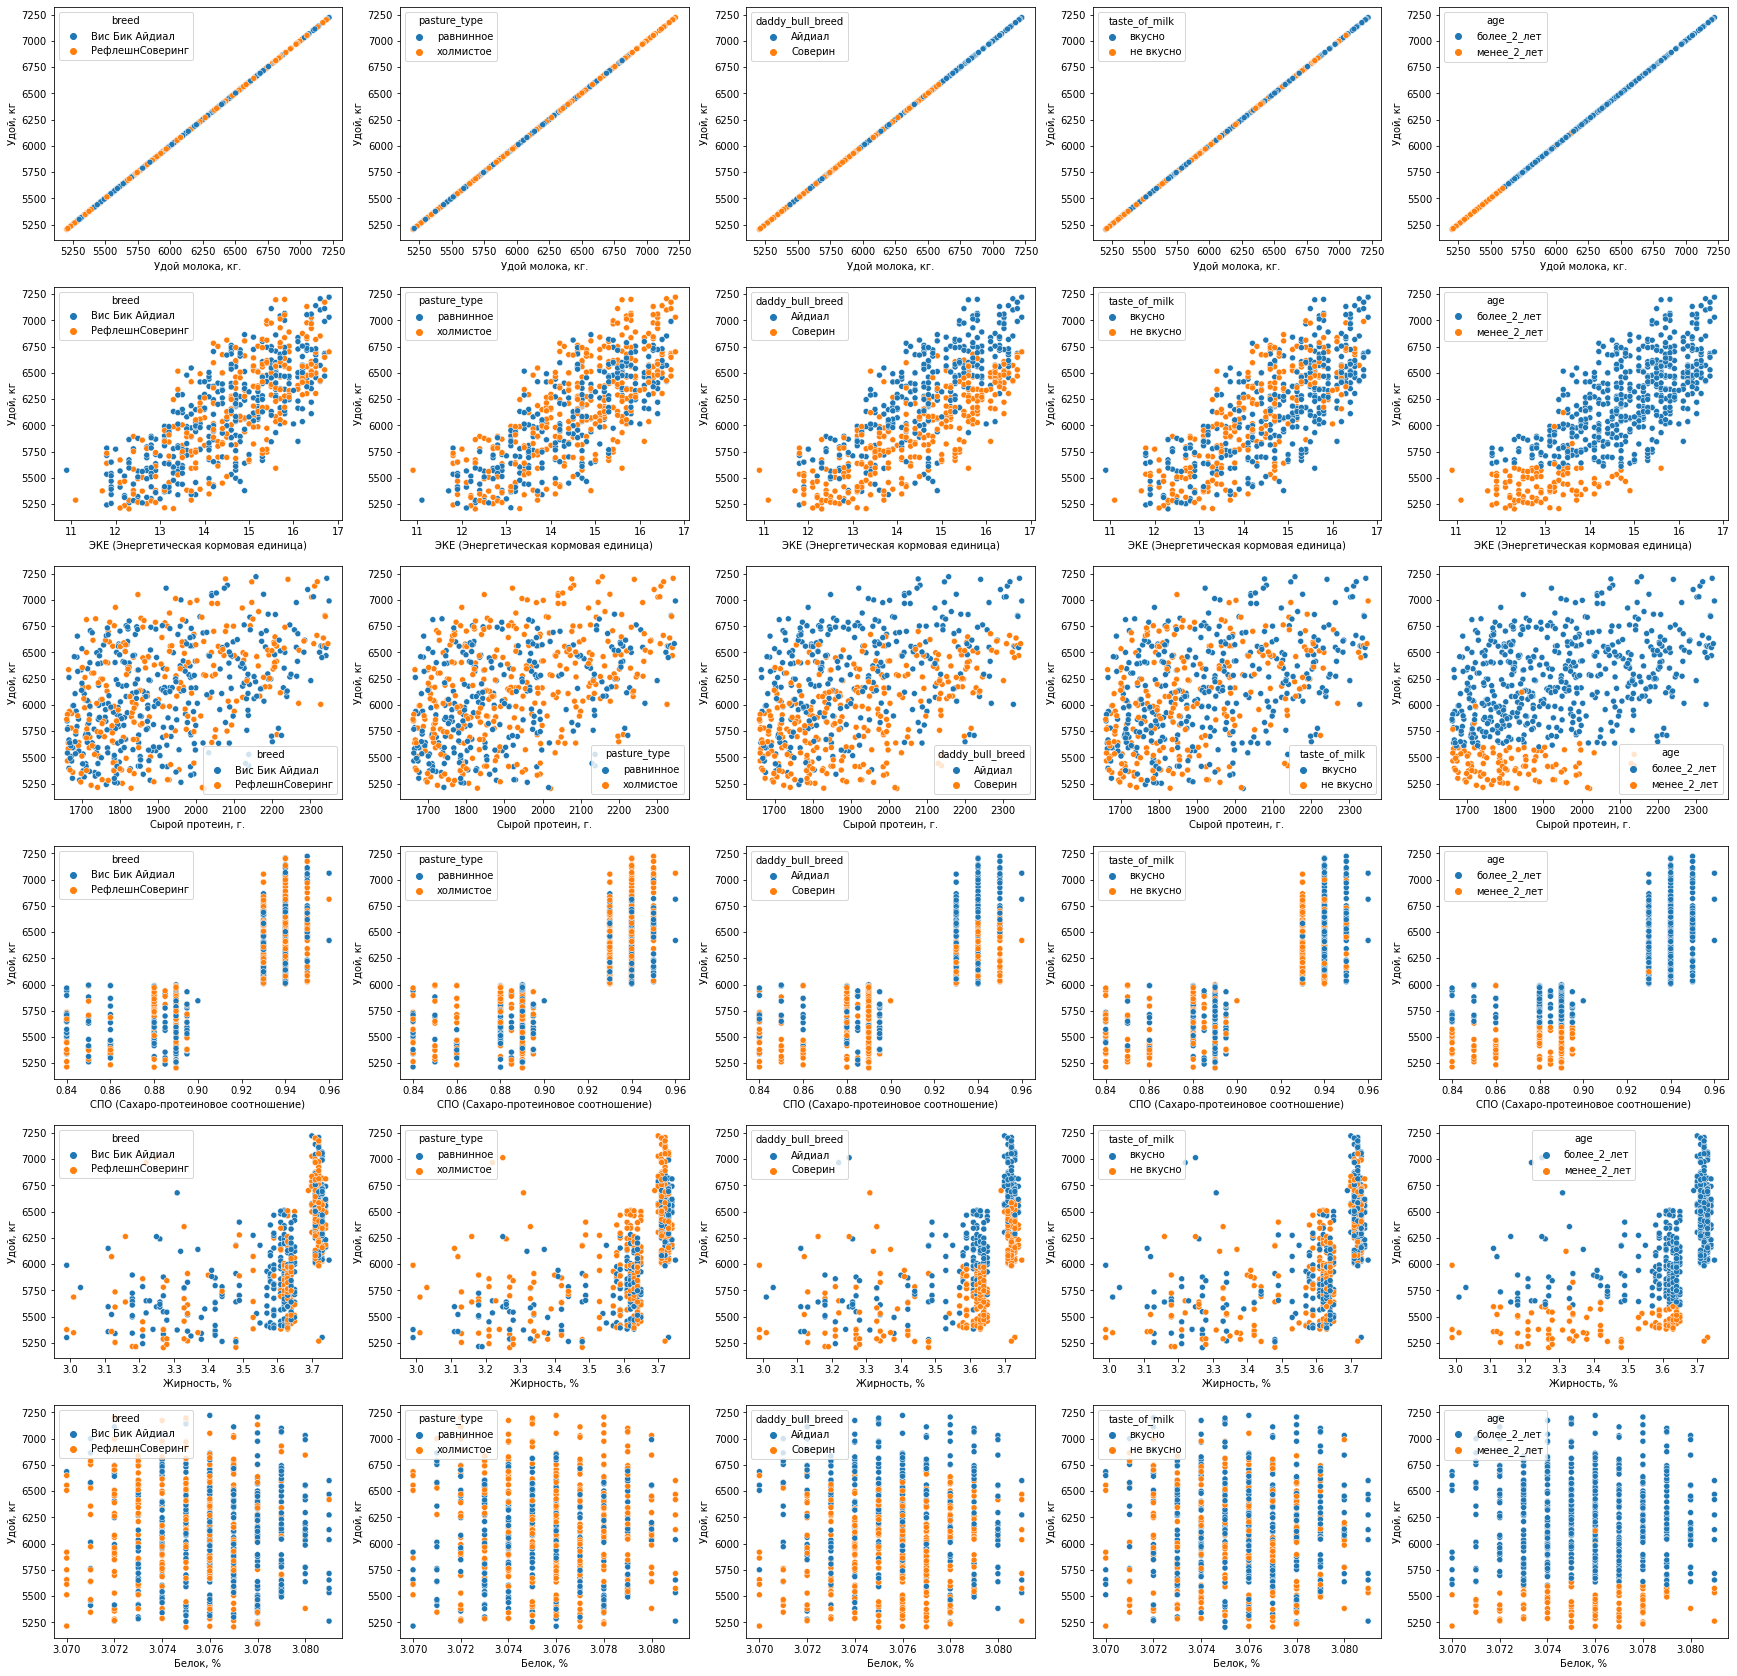

In [52]:
figure, axes = plt.subplots(len(num_list_ferma_main), len(cat_list_ferma_main), figsize=(30, 30))

for idx_n, column_num in enumerate(num_list_ferma_main):
    for idx_c, column_cat in enumerate(cat_list_ferma_main):
          
        ax = sns.scatterplot(x=column_num,
        y='milk_yield',
        hue=column_cat,
        data=ferma_main, 
        ax=axes[idx_n][idx_c]
        )
        
        ax.set(xlabel=x_label_num_list_ferma_main[idx_n], ylabel='Удой, кг')

*Диаграмма рассеяния для удоя и эке.*   
- Выявлена квадратичная зависимость. Для коров, произошедших от быков породы Айдиал, увеличение ЭКЕ сильнее влияет (прямо) на величину удоя.  
- Для коров младше двух лет рост ЭКЕ несильно влияет на удой. В то же время для коров старше двух лет наблюдается прямая зависимость величины удоя от ЭКЕ.

*Диаграмма рассеяния для удоя и сырого протеина.*  
- Наблюдатеся слабая зависимость. Для коров, произошедших от быков породы Айдиал, увеличение сырого протеина способствует увеличению удоя.  
- Для коров младше двух лет рост удой не растет с увеличением сырого протеина. В то же время для коров старше двух лет наблюдается рост величины удоя с увеличением содержания протеина в корме.

*Диаграмма рассеяния для удоя и спо.*
- Коровы, произошедшие от быков породы Айдиал, с увеличением сахарно-протеинового соотношения дают больший Удой, нежели коровы от быков Соверинг.  
- Рост Удоя по мере увеличения метрики здесь также характерен только для коров старше двух лет.

**Промежуточные выводы.**    

*Какой тип взаимосвязи между целевым и входными признаками?*
- Судя по диграмме рассеяния, между Удоем и ЭКЕ квадратичная зависимость. Корреляция высокая (r=0.77).
- Средняя корреляция (r=0.44) и высокая дисперсия характерны для значений Удоя и сырого протеина.
- Также заметна прямая зависимость Удоя от СПО (r=0.79). Значение СПО в дальнейшем следует преобразовать в категориальный признак, разделение провести по значению 0.91-0.92.  
- Высокую корреляцию по отношению к удою имеет жирность молока. Зависимость больше похожа на квадратичную. Напрашивается разделение признака "жирность" на несколько групп.  
- Взаимосвязь между удоем и содержанием в молоке белка отсутствует (r = -0.01).  

*Есть ли нелинейные связи между целевым и входными признаками?  
Нужно ли вводить в модель дополнительные признаки, чтобы это учесть?*

- Между удоем и ЭКЕ наблюдается квадратичная связь. В целях избавления от квадратичности введем новый признак ЭКЕ^2.  
- Между удоем и СПО видна зависимость по категории СПО (разделим его на категории).  
- Между удоем и жирностью прослеживается похожая на квадратичную взаимосвязь. Возможно, возведя жирность в квадрат, получится от нее избавиться. Также вероятно, что жирность можно представить категориями.

*Наблюдается ли мультиколлинеарность между входными признаками?*

- Между входными признаками не наблюдается корреляции, где *r* превышал бы значение 0.8-0.9. Соответственно, мультиколлениарность отсутствует.

**Вывод:**  
При рассмотрении диаграмм рассеяния для признака *Удой* и всех количественных признаков наиболее явными оказались такие категориальные признаки, как *Порода папы-быка* и *Возраст*.  
Так, при одних и тех же параметрах корма (*ЭКЕ (Энергетическая кормовая единица)*, *СПО (Сахаро-протеиновое соотношение)* и *Сырой протеин*) коровы, произошедшие от папы-быка породы *Айдиал*, заметно удойнее.  
Можно заметить, что молодые коровы в большинстве своем произошли от папы-быка породы *Соверин*. Они кормятся менее насыщенными кормами и дают меньший удой, который, за редким исключением, не превышает 5700 кг. молока в год. Однако он не уступает по содержанию белка молоку зрелых особей.  
Также заметно разделение по сахаро-протеиновому соотношению корма в зависимости от удоя: для коров, дающих молока от 6000 кг. в год этот показатель на несколько процентов выше, чем для менее удойных коров.  
Граница, разделяющая коров по Удою проходит на уровне 0.91-0.92 ЭКЕ.

## Шаг 5. Задача регрессии

###	Подготовим данные датасета ferma_main.csv и обучим на них первую модель LinearRegression. 

**Признаки в датасете ferma_main.csv можно разделить на группы.**


**Характеристики коровы: *id, порода, порода_папы_быка, возраст.***

- Возраст является показательным признаком, от него напрямую зависит Удой коров.  
- Также имеют сильное влияние на значение Удоя порода коровы и, в особенности, порода папы быка.    
    

**Характеристики корма: *ЭКЕ (Энергетическая кормовая единица), Сырой протеин_г, СПО (Сахаро-протеиновое соотношение).***

- ЭКЕ и СПО имеют самую высоку корреляцию с Удоем, а также между собой (r=0.75).  
- Среднюю корреляцию с Удоем имеет Сырой протеин. 
Полагаю, все эти "входные" характеристики корма должны оказывать важное влияние на удой и качество молока. 

**Характеристика пастбища: *Тип пастбища.***

На диаграммах рассеяния видно, что холмистые пастбища способствуют большему Удою, нежели равнинные.

**Характеристики молока: *удой_кг, жирность_%, белок_%, вкус молока.***

Данные признаки являются "выходными". Характеристики молока являются следствием всех перечисленных выше факторов и влияют на его вкус.

**Выделим признаки, которые подходят для модели линейной регрессии**

- числовые - *ЭКЕ*, *сырой протеин*, *СПО*  

- категориальные - *порода*, *порода папы быка*, *возраст*, *тип пастбища*

**Целевой признак - Удой**

In [53]:
# Определение функции для обучения модели LinearRegression

def ln_regression_fx(df, ferma_cat_list, ferma_num_list):
    
    # Создание константы RANDOM_STATE

    RANDOM_STATE = 42

    # Разделение выборки на входные (X) и целевые (y) признаки

    X = df[ferma_cat_list+ferma_num_list]
    y = df['milk_yield']

    # Разделение входных и целевого признаков на тренировочную и тестовую выборки в соотношении 3:1

    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size=0.25,
                                                        random_state=RANDOM_STATE
                                                       )
    # Проверка размерности выборок

    print(X_test.shape, y_test.shape, X_train.shape, y_train.shape)
    
    # Кодирование категориальных признаков с помощью OneHotEncoder

    encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown = 'error')
    X_train_ohe = encoder.fit_transform(X_train[ferma_cat_list])
    X_test_ohe = encoder.transform(X_test[ferma_cat_list])

    encoder_col_names = encoder.get_feature_names()
    
    # Масштабирование количественных признаков с помощью StandardScaler

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[ferma_num_list])
    X_test_scaled = scaler.transform(X_test[ferma_num_list])
    
    # Создание тренировочного и тестового датафреймов из закодированных и отмасштабированных данных

    X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
    X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

    X_train_scaled = pd.DataFrame(X_train_scaled, columns=ferma_num_list)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=ferma_num_list)
    
    # Объединение всех преобразованных данных в тренировочный и тестовый датафреймы

    X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
    X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
    
    # Визуализация распределения значений признаков

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

    X_train[ferma_num_list].plot(kind='hist', bins=10, ax=axes[0], alpha=0.7)
    axes[0].set_title('Гистограмма распределения')
    X_train[ferma_num_list].plot(kind='box', ax=axes[1], rot=45)
    axes[1].set_title('Разброс значений признаков')
    plt.show()
    
    # Инициализация и обучение модели на тренировочных данных

    model_lr = LinearRegression()
    model_lr.fit(X_train, y_train)

    # Предсказанные значения для X_test
    
    predictions = model_lr.predict(X_test)
            
    # Коэффициент детерминации R^2

    r2 = r2_score(y_test, predictions)
    print(f'Коэффициент детерминации R2: {r2:.3}')
    
    # MSE - среднеквадратичная ошибка
    
    MSE = mean_squared_error(y_test, predictions)
    print(f'MSE = {MSE:.0f}')
    
    # RMSE — корень среднеквадратичной ошибки
    
    RMSE = mean_squared_error(y_test, predictions, squared=False)
    print(f'RMSE = {RMSE:.0f}')
    
    # MAE — средняя абсолютная ошибка
    
    MAE = mean_absolute_error(y_test, predictions)
    print(f'MAE = {MAE:.0f}')

    # Рассчет остатков
    
    residuals = y_test - predictions

    # Анализ остатков и дисперии с помощью графиков
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    axes[0].hist(residuals, bins=10)
    axes[0].set_title('Гистограмма распределения остатков')
    axes[0].set_xlabel('Остатки')

    axes[1].scatter(x=predictions, y=residuals)
    axes[1].set_xlabel('Предсказания модели')
    axes[1].set_ylabel('Остатки')
    axes[1].set_title('Анализ дисперсии')
    
    plt.show()
    
    return encoder, scaler, model_lr, predictions, r2, residuals, MSE, RMSE, MAE

In [54]:
ferma_cat_list_1 = ['breed' , 'pasture_type', 'daddy_bull_breed', 'age']
ferma_num_list_1 = ['energy_feed_unit', 'crude_protein', 'sugar_protein_ratio']

(156, 7) (156,) (467, 7) (467,)


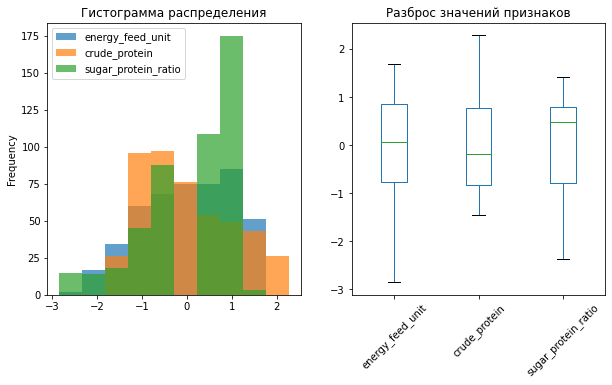

Коэффициент детерминации R2: 0.783
MSE = 47500
RMSE = 218
MAE = 174


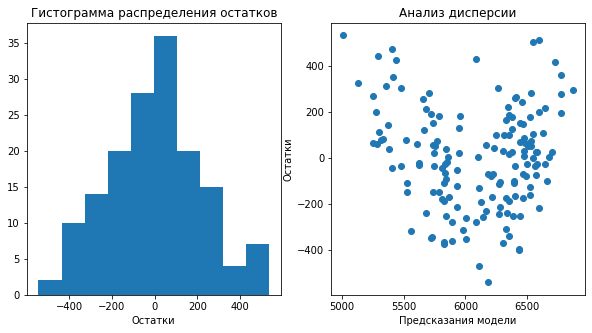

In [55]:
encoder_1, scaler_1, model_lr1, predictions_1, r2_1, residuals_1, MSE_1, RMSE_1, MAE_1 = ln_regression_fx(
    ferma_main, ferma_cat_list_1, ferma_num_list_1)

Остатки распределены относительно симметрично, распределение похоже на нормальное. Возможно, при дальнейшей комбинации входных признаков, получится улучшить показатели метрик. 

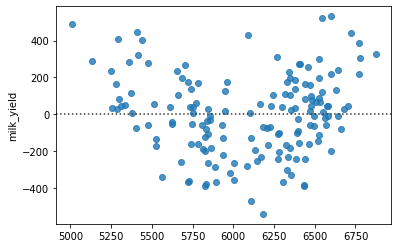

In [56]:
sns.residplot(x=predictions_1, y=residuals_1);

### Подготовим данные с учётом связи входных признаков с целевым и обучим на них вторую модель LinearRegression.

In [57]:
# Изменим входные признаки: СПО разделим на две категории, а ЭКЕ возведем в квадрат

ferma_main['sugar_protein_ratio_cat'] = ferma_main['sugar_protein_ratio'].apply(lambda spo: 'high' if spo>=0.92 else 'low')
ferma_main['energy_feed_unit_sqr'] = ferma_main['energy_feed_unit'] ** 2

ferma_cat_list_2 = ['breed', 'pasture_type', 'daddy_bull_breed', 'age', 'sugar_protein_ratio_cat']
ferma_num_list_2 = ['crude_protein', 'energy_feed_unit_sqr']

(156, 7) (156,) (467, 7) (467,)


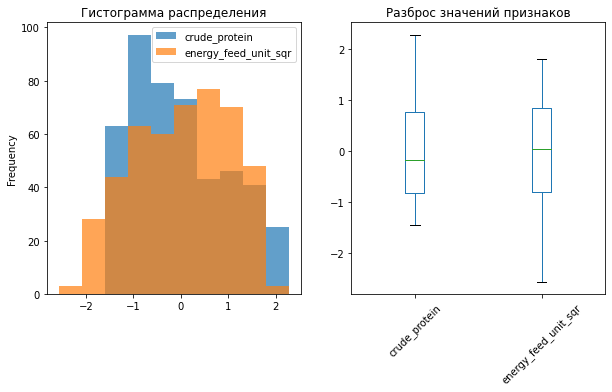

Коэффициент детерминации R2: 0.835
MSE = 36207
RMSE = 190
MAE = 150


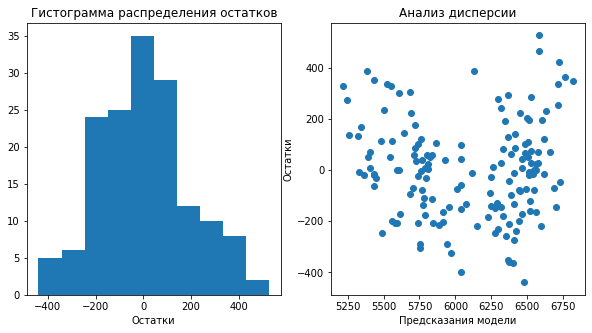

In [58]:
encoder_2, scaler_2, model_lr2, predictions_2, r2_2, residuals_2, MSE_2, RMSE_2, MAE_2 = ln_regression_fx(
    ferma_main, ferma_cat_list_2, ferma_num_list_2)

В результате остатки распределились "кучнее", R^2 заметно вырос, а MSE, RMSE и MAE снизились.   
Налицо улучшение модели, но нет предела совершенству - попробуем "докрутить" результат до максимально оптимального.

### Добавим в данные новый признак и обучим на них третью модель LinearRegression

Добавим признак *Имя Папы* из файла *ferma_dad.csv*, соединив его с остальными данными *ferma_main.csv* по ключу 'id':

In [59]:
ferma_main = ferma_main.merge(ferma_dad, on='id')

In [60]:
# Добавим белок в модель, подставим числовой СПО вместо категориального

ferma_cat_list_3 = ['breed', 'pasture_type', 'daddy_bull_breed', 'age', 'sugar_protein_ratio_cat', 'dads_name']
ferma_num_list_3 = ['crude_protein', 'energy_feed_unit_sqr', 'fat_content']

ferma_main.head()

,id,milk_yield,energy_feed_unit,crude_protein,sugar_protein_ratio,breed,pasture_type,daddy_bull_breed,fat_content,protein,taste_of_milk,age,sugar_protein_ratio_cat,energy_feed_unit_sqr,dads_name
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,low,201.64,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,low,163.84,Соловчик
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,low,196.00,Барин
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,low,153.76,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,low,163.84,Барин


(156, 9) (156,) (467, 9) (467,)


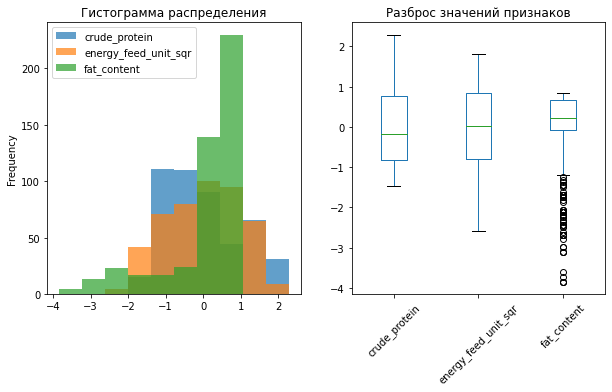

Коэффициент детерминации R2: 0.841
MSE = 34836
RMSE = 187
MAE = 147


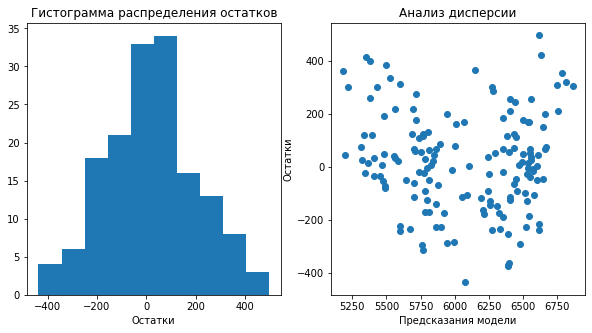

In [61]:
encoder_3, scaler_3, model_lr_3, predictions_3, r2_3, residuals_3, MSE_3, RMSE_3, MAE_3 = ln_regression_fx(
    ferma_main, ferma_cat_list_3, ferma_num_list_3)

После добавления признака "белок" метрики получились выше, мы нашли оптиальную модель.

### Сравним качество трёх моделей линейной регрессии, сопоставим их R² и остатки

In [62]:
metrics_list = ['R2', 'MSE', 'RMSE', 'MAE']

model_1_list = [r2_1, MSE_1, RMSE_1, MAE_1]
model_2_list = [r2_2, MSE_2, RMSE_2, MAE_2]
model_3_list = [r2_3, MSE_3, RMSE_3, MAE_3]

data_model_mitrics = pd.DataFrame([model_1_list, model_2_list, model_3_list],
                                  columns=metrics_list,
                                  index=['Первая модель', 'Вторая модель', 'Третья модель'])
display(data_model_mitrics)

,R2,MSE,RMSE,MAE
Первая модель,0.783203,47499.999455,217.944946,173.801223
Вторая модель,0.834744,36207.490016,190.282658,149.719800
Третья модель,0.841005,34835.556497,186.642858,146.694132


**Интерпретация метрик:**  
- MSE и RMSE лучше всего подходят, когда у данных высокая дисперсия;
- MAE более устойчива к выбросам, поэтому её применяют, чтобы минимизировать влияние аномальных значений при оценке качества модели;  
- Коэффициент детерминации R² указывает насколько тесной является связь между факторами регрессии и зависимой переменной, это соотношение объясненных сумм квадратов возмущений, к необъясненным.  

**Чем меньше значения MSE, RMSE и MAE, тем точнее модель. В случае R² всё иначе: чем ближе к единице значение метрики, тем выше обобщающая способность модели.**

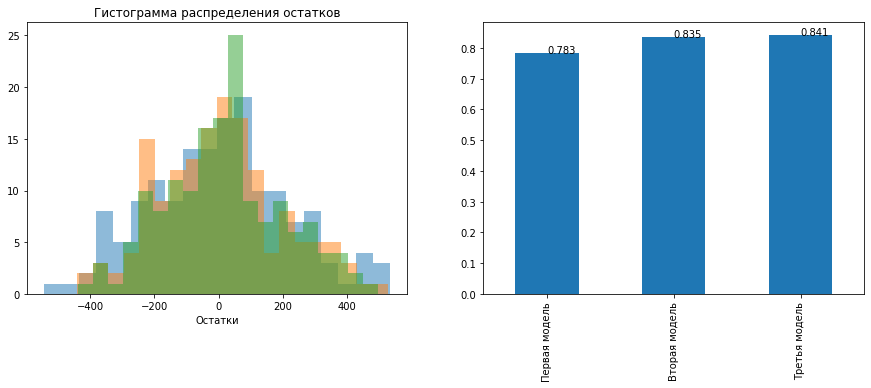

In [63]:
residuals_list = [residuals_1, residuals_2, residuals_3]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

for i in (residuals_list):
    axes[0].hist(i, bins=20, alpha=0.5)
    axes[0].set_title('Гистограмма распределения остатков')
    axes[0].set_xlabel('Остатки')

axes[1] = data_model_mitrics['R2'].plot.bar()

r2_lst = round(data_model_mitrics['R2'], 3)
for i in range(3):
    axes[1].text(x = i, y = r2_lst[i], s = r2_lst[i])


- Наибольший коэфицент детерминации выявлен у третьей модели (R² = 0.841) - он ближе всего к 1. Распределение остатков третьей модели в большей степени похоже на нормальное (колокол), нежели у модели_1 и модели_2. 
- Модель_3 имеет существенно мешьшие значения квадратичных и абсолютных ошибок. 

**Таким образом, можно сделать вывод о том, что Модель_3 является наиболее точной из трех построенных.   
Принимаем Модель_3 для дальнейшего просторения прогнозов.**

Укажим доверительный интервал прогноза лучшей модели. Для этого рассчитаем квантили ошибки модели на тренировочных данных

In [64]:
st.norm.interval(confidence=0.95, loc=np.mean(predictions_3), scale=st.sem(predictions_3))

(6000.398853304271, 6139.76553188442)

- Доверительный интервал для истинного среднего прогноза третьей модели при уровне статистической значимости 0.05 - (600.4, 6139.8). 
- В нашем случае объем выборки predictions_3 достаточно велик (более 150 значений). Согласно центральной предельной теореме принимаем, что выборочные средние распределены нормально. Это позволяет нам посчитать доверителный интервал используя нормальное распределение с дисперсией и математическим ожиданием как у predictions_3.

In [65]:
model_lr_3.coef_

array([  35.7636275 ,   59.38010039,   45.36980381, -179.77211786,
       -347.28995965,  314.52912627,  357.1562727 ,   35.21074939,
         46.99282537,  148.19452716,   30.07159053])

## С помощью лучшей модели спрогнозируем удой коров, которых фермер хочет купить

In [66]:
cow_buy.head()
#ferma_main.head()

,breed,pasture_type,daddy_bull_breed,dads_name,fat_content,protein,age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


### Добавим недостающие признаки ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение): возьмем из датасета ferma_main.csv средние значения каждого из признаков и увеличим их на 5%

In [67]:
cow_buy['energy_feed_unit'] = ferma_main['energy_feed_unit'].mean() * 1.05
cow_buy['crude_protein'] = ferma_main['crude_protein'].mean() * 1.05
cow_buy['sugar_protein_ratio'] = round(ferma_main['sugar_protein_ratio'].mean() * 1.05, 2)

cow_buy.head()

,breed,pasture_type,daddy_bull_breed,dads_name,fat_content,protein,age,energy_feed_unit,crude_protein,sugar_protein_ratio
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276742,2019.77191,0.96
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276742,2019.77191,0.96
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276742,2019.77191,0.96
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276742,2019.77191,0.96
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276742,2019.77191,0.96


### Выполним подготовку данных, аналогичную той, которую делали для тренировочной выборки

In [68]:
cow_buy['energy_feed_unit_sqr'] = cow_buy['energy_feed_unit'] ** 2
cow_buy['sugar_protein_ratio_cat'] = cow_buy['sugar_protein_ratio'].apply(lambda x: 'high' if x > 0.92 else 'low')

cow_buy_cat_list = ['breed', 'pasture_type', 'daddy_bull_breed', 'age', 'sugar_protein_ratio_cat', 'dads_name']
cow_buy_num_list = ['crude_protein', 'energy_feed_unit_sqr', 'fat_content']

#cow_buy.head(5)

In [69]:
# Кодирование признаков выборки cow_buy на основании третьей модели LR

encoded = encoder_3.transform(cow_buy[cow_buy_cat_list])
encoder_col_names = encoder_3.get_feature_names()

# Масштабирование признаков 

scaled = scaler_3.transform(cow_buy[cow_buy_num_list])

encoded = pd.DataFrame(encoded, columns=encoder_col_names)
scaled = pd.DataFrame(scaled, columns=cow_buy_num_list)

# Объединяем
merged = pd.concat([encoded, scaled], axis=1)

#merged.head(5)

Получим прогноз удоя коров:

In [70]:
final_predict = model_lr_3.predict(merged)
display(final_predict)

array([6591.2105249 , 6347.36773453, 6257.66589048, 6550.89747329,
       6536.11674979, 6442.48327481, 6532.71477451, 6371.12535543,
       6342.50941595, 6640.83846638, 6609.7935986 , 6069.91902021,
       6550.89747329, 6342.50941595, 6468.499578  , 6489.97370498])

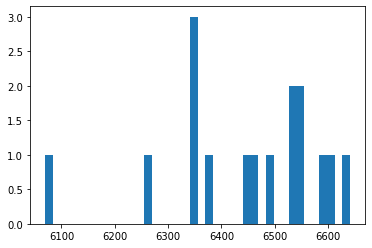

In [71]:
plt.hist(final_predict, bins=40);
plt.show()

Каждая из 16 представленных к покупке коров дает удой, превышающий 6000 кг. молока в год.  
Так, критерий фермера по удою выдержан.

## Шаг 6. Задача классификации

### Подготовим данные датасета ferma_main.csv и обучим на них модель LogisticRegression

Перед нами задача - спрогнозировать вкус молока (вкусно/не вкусно - бинарный признак).  
- входные признаки: жирность, белок, ЭКЕ, СПО, сырой протеин. От питания коровы зависят характеристики молока;  
- целевой принак: вкус молока.

Попробуем выявить взаимосвязь целевего признака с категориальными.

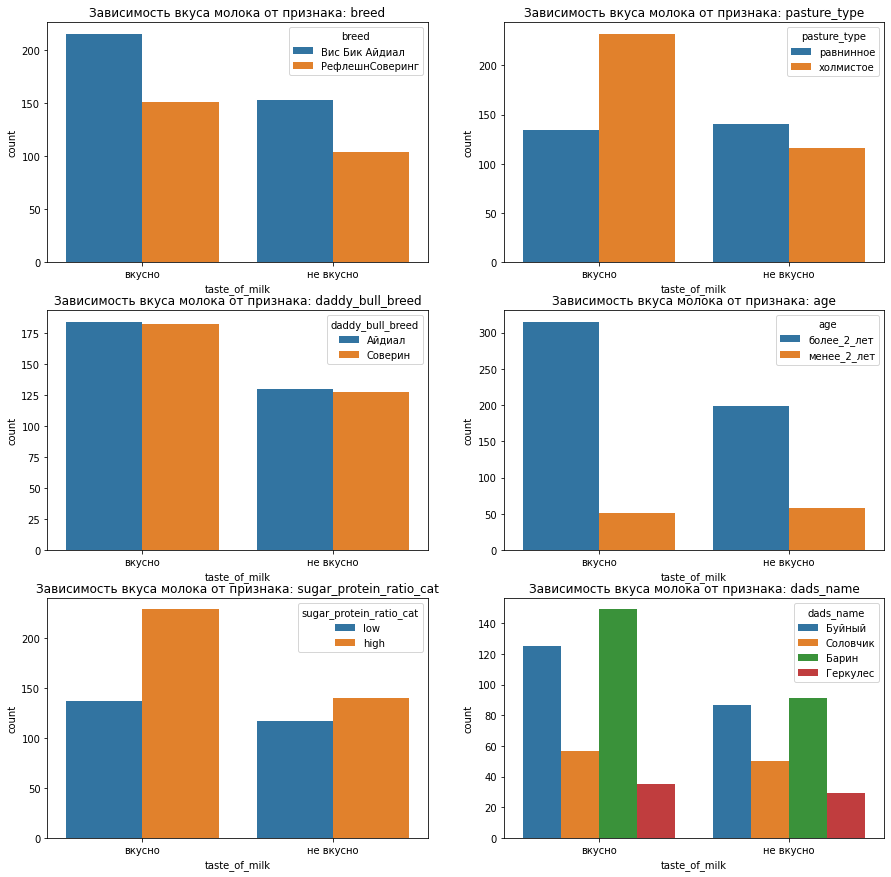

In [72]:
cat_list_depend_taste = ['breed',
                       'pasture_type',
                       'daddy_bull_breed',
                       'age',
                       'sugar_protein_ratio_cat',
                       'dads_name'
                      ]
fig = plt.figure(figsize=(15,15))

for idx, column in enumerate(cat_list_depend_taste):
    fig.add_subplot(3, 2, idx + 1);
    ax = sns.countplot(x = 'taste_of_milk', hue = column, data = ferma_main);
    ax.set_title(f'Зависимость вкуса молока от признака: {column}')

На построенных выше графиках выявлена внятная зависимость вкуса молока от *возраста, имени папы коровы*, а также от *сахарно-протеинового соотношения (катег.) и типа пастбища*.

In [73]:
# Кодируем целевой признак (вкусно-1, не вкусно-0)

ferma_main['taste_of_milk'] = ferma_main['taste_of_milk'].apply(lambda x: 1 if x == 'вкусно' else 0)

In [74]:
# Создадим функцию логистической регрессии:

def lgs_regression_fx(df, lgs_num_list, lgs_cat_list):
    
    RANDOM_STATE = 42
    
    X = df[lgs_num_list+lgs_cat_list]
    y = df['taste_of_milk']
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        random_state=RANDOM_STATE,
                                                        stratify=y
                                                       )
    # Кодируем:
    encoder_clf = OneHotEncoder(drop='first', sparse=False, handle_unknown = 'error')
    X_train_ohe = encoder_clf.fit_transform(X_train[lgs_cat_list])
    X_test_ohe = encoder_clf.transform(X_test[lgs_cat_list])

    encoder_col_names = encoder_clf.get_feature_names()
    print(encoder_col_names)
    
    # Мастштабируем:
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[lgs_num_list])
    X_test_scaled = scaler.transform(X_test[lgs_num_list])

    # Создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных:
    X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
    X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

    X_train_scaled = pd.DataFrame(X_train_scaled, columns=lgs_num_list)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=lgs_num_list)

    # Объединяем все преобразованные данные в тренировочный и тестовый датафреймы:
    X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
    X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
   
    print(X_train.shape, X_test.shape)

    # Обучим модель:
    clf_model = LogisticRegression()
    clf_model = clf_model.fit(X_train, y_train)
    
    # Получим прогнозные метки классов:
    y_pred = clf_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    print('Accuracy =', accuracy)
    print('Recall =', recall)
    print('Precision =', precision)
    
    return (X_train, X_test, y_train, y_test, 
            encoder_clf, encoder_col_names, scaler, clf_model, y_pred, accuracy, recall, precision)

In [75]:
lgs_num_list_1 = ['crude_protein', 'fat_content', 'protein', 'energy_feed_unit', 'sugar_protein_ratio']
lgs_cat_list_1 = ['breed', 'pasture_type', 'dads_name', 'age', 'daddy_bull_breed']

In [76]:
(X_train_1, X_test_1, y_train_1, y_test_1, encoder_clf_1, encoder_col_names_1, scaler_1, clf_model_1, y_pred_1,
 accuracy_1, recall_1, precision_1) = lgs_regression_fx(
    ferma_main, lgs_num_list_1, lgs_cat_list_1
    )

['x0_РефлешнСоверинг' 'x1_холмистое' 'x2_Буйный' 'x2_Геркулес'
 'x2_Соловчик' 'x3_менее_2_лет' 'x4_Соверин']
(467, 12) (156, 12)
Accuracy = 0.6282051282051282
Recall = 0.8586956521739131
Precision = 0.6370967741935484


Учитывая дискретный характер распределения *сахаро-протеинового соотношения* и *белка*, а также условно-дискретное распределение *жирности*, попробуем представить численные эти признаки как категориальные. Возможно, это улучшит метрики модели.

In [77]:
fat_content_cat_fm = []

for i in ferma_main['fat_content']:
    if i<3.6:
        fat_content_cat_fm.append('low')
    else:
        fat_content_cat_fm.append('high')
        
ferma_main['fat_content_cat'] = fat_content_cat_fm

In [78]:
fat_content_cat_cb = []

for i in cow_buy['fat_content']:
    if i<3.6*1.05:
        fat_content_cat_cb.append('low')
    else:
        fat_content_cat_cb.append('high')
        
cow_buy['fat_content_cat'] = fat_content_cat_cb

In [79]:
lgs_cat_list_2 = ['breed','pasture_type', 'dads_name', 'daddy_bull_breed', 'age', 'sugar_protein_ratio_cat', 'fat_content_cat']
lgs_num_list_2 = ['crude_protein', 'energy_feed_unit', 'protein']

In [80]:
(X_train_2, X_test_2, y_train_2, y_test_2, encoder_clf_2, encoder_col_names_2, scaler_2, clf_model_2, y_pred_2,
 accuracy_2, recall_2, precision_2) = lgs_regression_fx(
    ferma_main, lgs_num_list_2, lgs_cat_list_2
)

['x0_РефлешнСоверинг' 'x1_холмистое' 'x2_Буйный' 'x2_Геркулес'
 'x2_Соловчик' 'x3_Соверин' 'x4_менее_2_лет' 'x5_low' 'x6_low']
(467, 12) (156, 12)
Accuracy = 0.6346153846153846
Recall = 0.8478260869565217
Precision = 0.6446280991735537


In [81]:
#cow_buy.columns

In [82]:
#ferma_main.columns

In [83]:
lgs_cat_list_3 = ['breed','pasture_type', 'dads_name', 'daddy_bull_breed', 'sugar_protein_ratio']
lgs_num_list_3 = ['crude_protein', 'energy_feed_unit_sqr', 'protein', 'fat_content']

In [84]:
(X_train_3, X_test_3, y_train_3, y_test_3, encoder_clf_3, encoder_col_names_3, scaler_3, clf_model_3, y_pred_3,
 accuracy_3, recall_3, precision_3) = lgs_regression_fx(
    ferma_main, lgs_num_list_3, lgs_cat_list_3
)

['x0_РефлешнСоверинг' 'x1_холмистое' 'x2_Буйный' 'x2_Геркулес'
 'x2_Соловчик' 'x3_Соверин' 'x4_0.85' 'x4_0.86' 'x4_0.88' 'x4_0.885'
 'x4_0.89' 'x4_0.895' 'x4_0.9' 'x4_0.93' 'x4_0.94' 'x4_0.95' 'x4_0.96']
(467, 21) (156, 21)
Accuracy = 0.7243589743589743
Recall = 0.8043478260869565
Precision = 0.7474747474747475


In [85]:
metrics_list = ['Accuracy', 'Recall', 'Precision']

model_1_list = [accuracy_1, recall_1, precision_1]
model_2_list = [accuracy_2, recall_2, precision_2]
model_3_list = [accuracy_3, recall_3, precision_3]

data_model_mitrics = pd.DataFrame([model_1_list, model_2_list, model_3_list],
                                  columns=metrics_list,
                                  index=['Первая модель', 'Вторая модель', 'Третья модель'])
display(data_model_mitrics)

,Accuracy,Recall,Precision
Первая модель,0.628205,0.858696,0.637097
Вторая модель,0.634615,0.847826,0.644628
Третья модель,0.724359,0.804348,0.747475


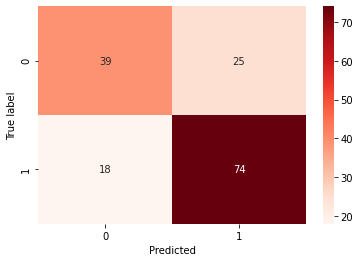

In [86]:
conf_mtx = confusion_matrix(y_test_3, y_pred_3)
sns.heatmap(conf_mtx, annot=True, fmt='d', cmap='Reds')
plt.ylabel('True label')
plt.xlabel('Predicted')
plt.show()

Предсказания модели:   
- "Истинно-вкусно" - 74 раз,
- "Истинно-невкусно" - 39 раз,  
- "Ложно-вкусно" - 25 раз,
- "Ложно-невкусно" - 18 раз.

Фермер ценит лояльность покупателей, ему важно, чтобы его молоко действительно всегда было вкусное. Таким образом, нужно минимизировать ложно-положительные (False Positive) значения модели, чтобы модель прогнозировала вкусное молоко лишь в том случае, если действительно в этом уверена.

**Интерпретация метрик**  

- *Accuracy* - эта метрика отражает общую долю верно предсказанных классов, как положительных (1 - вкусно), так и отрицательных (0 - невкусно). Третья модель верно предсказывают классы в 70.5% случаев.  

- *Recall, полнота* — эта метрика отражает долю объектов класса 1, которые спрогнозированы верно, от общего числа объектов класса 1. Третья модель выявляет 81.61% всех коров, дающих вкусное молоко.  

- *Precision, точность* — эта метрика показывает точность, с которой модель присваивает объектам класс 1.  
Иными словами, precision определяет, не слишком ли часто модель выставляет класс 1 объектам класса 0.


Важно, чтобы среди коров, для которых предсказано вкусное молоко, нашлось как можно меньше коров, которые в действительности дадут невкусное молоко.  
В нашем случае ключевой метрикой будет *precision*, ошибки False Positive неприемлемы. 

In [87]:
proba = clf_model_3.predict_proba(X_test_3)[:,1]
precisions = []
for threshold in np.linspace(0.7, 0.9, 100):
    val = [1 if i > threshold else 0 for i in proba]
    precisions.append(precision_score(y_test_3, val))
    print(round(threshold, 3), '->', round(precision_score(y_test_3, val), 3))

0.7 -> 0.881
0.702 -> 0.881
0.704 -> 0.881
0.706 -> 0.881
0.708 -> 0.879
0.71 -> 0.877
0.712 -> 0.875
0.714 -> 0.889
0.716 -> 0.889
0.718 -> 0.889
0.72 -> 0.889
0.722 -> 0.887
0.724 -> 0.885
0.726 -> 0.914
0.728 -> 0.914
0.73 -> 0.914
0.732 -> 0.914
0.734 -> 0.912
0.736 -> 0.912
0.738 -> 0.912
0.74 -> 0.912
0.742 -> 0.911
0.744 -> 0.911
0.746 -> 0.911
0.748 -> 0.911
0.751 -> 0.911
0.753 -> 0.911
0.755 -> 0.911
0.757 -> 0.911
0.759 -> 0.909
0.761 -> 0.907
0.763 -> 0.907
0.765 -> 0.907
0.767 -> 0.907
0.769 -> 0.923
0.771 -> 0.923
0.773 -> 0.923
0.775 -> 0.923
0.777 -> 0.923
0.779 -> 0.923
0.781 -> 0.923
0.783 -> 0.923
0.785 -> 0.923
0.787 -> 0.923
0.789 -> 0.923
0.791 -> 0.923
0.793 -> 0.923
0.795 -> 0.941
0.797 -> 0.941
0.799 -> 0.941
0.801 -> 0.941
0.803 -> 0.96
0.805 -> 0.96
0.807 -> 0.96
0.809 -> 0.959
0.811 -> 0.959
0.813 -> 0.959
0.815 -> 0.958
0.817 -> 0.958
0.819 -> 0.958
0.821 -> 0.958
0.823 -> 0.958
0.825 -> 0.957
0.827 -> 0.957
0.829 -> 0.978
0.831 -> 0.977
0.833 -> 0.977
0.83

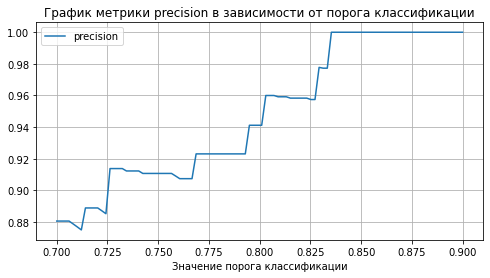

In [88]:
plt.figure(figsize = (8,4))  
plt.plot(np.linspace(0.7, 0.9, 100), precisions, label = 'precision')
plt.legend()
plt.grid()
plt.xlabel('Значение порога классификации')
plt.title('График метрики precision в зависимости от порога классификации')
plt.show()

Метрика Precision становится 1 при значениях порога от 0.835 и выше.  
Установим порог 0.835.

In [89]:
val_2 = [1 if i > 0.835 else 0 for i in proba]
print('precison =', precision_score(y_test_3, val_2))
print('accuracy =', accuracy_score(y_test_3, val_2))
print('recall =', recall_score(y_test_3, val_2))

precison = 1.0
accuracy = 0.6858974358974359
recall = 0.4673913043478261


Порог в 0.835 поднял *Percision* модели до единицы. Ошибки *False Positive* на тестовой выборке исчезли.  
Поскольку теперь модель очень чаще прогнозирует 0, реже - 1 (только когда уверена т.е вероятность больше 0.835), снизились значения метрик *Accuracy* и *Recall*, что закономерно.  
Из-за склонности модели с порогом 0.835 присваивать 0 класс, накапливаются ошибки *False Negative*, которые портят *Accuracy* и *Recall*.

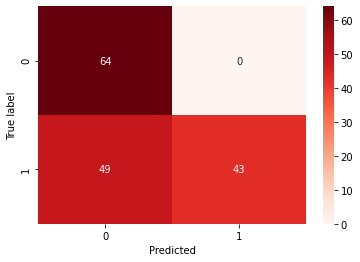

In [90]:
# Матрица ошибок для модели с порогом 0.835

conf_mtx_2 = confusion_matrix(y_test_3, val_2)
sns.heatmap(conf_mtx_2, annot=True, fmt='d', cmap='Reds')
plt.ylabel('True label')
plt.xlabel('Predicted')
plt.show()

Видно, что ошибки *False Positive* отсутствуют - 43 коровы действительно дают вкусное молоко. 

**Прогнозируем вкус молока для *cow_buy***

Используем 3 модель с порогом чтобы спрогнозировать вкус молока коров к покупке

In [91]:
#cow_buy.head()

In [92]:
#ferma_main.head()

In [93]:
# Кодируем категориальные признаки используя обученный на третьей модели кодировщик:
cow_encoded = encoder_clf_3.transform(cow_buy[lgs_cat_list_3])

print(cow_encoded)

encoder_col_names = encoder_clf_3.get_feature_names()
print(encoder_col_names)

# Масштабируем:
cow_scaled = scaler_3.transform(cow_buy[lgs_num_list_3])

#создаем датафрем с кодированными столбцами:
cow_encoded = pd.DataFrame(cow_encoded, columns=encoder_col_names)

#создаем датафрейм с мастштабированнымиданными
cow_scaled = pd.DataFrame(cow_scaled, columns=lgs_num_list_3)

#объединяем
cow = pd.concat([cow_encoded, cow_scaled], axis=1)
cow_predict_taste = clf_model_3.predict_proba(cow)
cow_predict_taste[:,1]

[[0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
['x0_РефлешнСоверинг' 'x1_холмистое' 'x2_Буйный' 'x2_Геркулес'
 'x2_Соловчик' 'x3_Соверин' 'x4_0.85' 'x4_0.86' 'x4_0.88' 'x4_0.885'
 'x

array([0.84419133, 0.4665193 , 0.55182347, 0.80551139, 0.59298137,
       0.40686833, 0.46397881, 0.81275483, 0.76337888, 0.41545177,
       0.83130542, 0.81530477, 0.80713921, 0.77448941, 0.40125047,
       0.46703161])

In [94]:
new_treshold = [1 if i > 0.835 else 0 for i in cow_predict_taste[:,1]]
predict_trsld_taste = pd.Series(new_treshold)
predict_trsld_taste

0     1
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64

Согласно третьей модели при выбранном пороге принадлежности к классу "1" в 0.835, корова под индексом "0" будут давать вкусное молоко.  

## Шаг 7. Сделаем итоговые выводы

### Добавим прогнозы вкуса молока и удоя коров «ЭкоФермы» в датафрейм с коровами, покупку которых рассматривает фермер.

In [95]:
# Трансформируем предсказание удоя в Series

final_predict = pd.Series(final_predict).astype(int)

# Добавим предсказания удоя и вкуса молока

cow_buy['milk_yield'] = final_predict

cow_buy['taste_of_milk'] = predict_trsld_taste
cow_buy['taste_of_milk'] = cow_buy['taste_of_milk'].replace(to_replace = {1 : 'вкусно',
                                                                          0 : 'не_вкусно'})
#cow_buy

### Отберем коров, для которых спрогнозирован удой более 6000 килограммов в год и вкусное молоко.

In [96]:
cow_buy.query('milk_yield > 6000 and taste_of_milk == "вкусно"')

,breed,pasture_type,daddy_bull_breed,dads_name,fat_content,protein,age,energy_feed_unit,crude_protein,sugar_protein_ratio,energy_feed_unit_sqr,sugar_protein_ratio_cat,fat_content_cat,milk_yield,taste_of_milk
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276742,2019.77191,0.96,233.378833,high,low,6591,вкусно


### Коротко опишем результаты работы моделей для фермера.

#### Сколько коров он может купить из стада на продажу с минимальным риском для себя? Почему?

Согласно прогнозам модели все коровы дадут больше 6000 кг. в год удоя, но вкусное молоко при выборе порога разделения на классы равном 0.8 дадут шесть коров - под индексами "0", "3", "7", "10", "11" и "12". В случае повышения порога с 0.8 до 0.835 фермеру подойдет лишь одна корова под индексом "0". Согласно оценке модели, вероятность, что молоко этой коровы будет вкусное - наибольшая, риск ее покупки - минимальный.  
Если же фермер задаст более высокий порог, то ни одна корова из 16 ему не подойдет.

#### Какие ещё рекомендации можно ему дать?

Помимо исследованных в Проекте признаков, возможно, было бы нелишним добавить следующие параметры:  
- физиологическое состояние животного,
- масса тела,
- наследственные признаки,
- продолжительность периода от отела до осеменения,
- сезон отела, 
- способ доения, 
- интервал между дойками и другие.

### Сделайте выводы о моделях линейной регрессии и логистической регрессии.

#### Какие способы улучшения качества регрессионной модели вы использовали в этой задаче?

В процессе оптимизации модели мы избавлялись от квадратичной зависимости между Удоем и ЭКЕ - ввели признак "ЭКЕ²". Также было произведено разделение значений СПО на две группы по условной границе, выявленной на диаграммах рассеяния. Был добавлен и новый признак - имя папы быка. Эти шаги позволили повысить точность прогноза и выбрать лучшую модель линейной регрессии.

#### Возможно ли ещё улучшить результаты регрессионной модели? Если можно, то как? Если нет, то почему?

В случае полного избавления от выбросов в значениях признака "жирность" (13.69% от df) картина бы изменилась - возможно, в лучшую сторону. Но в рамках проекта это слишком значительная потеря данных.   
На улучшение регрессионной модели влияет объем обрабатываемых данных. Чем больше значений, тем точнее модель.

#### Какие метрики моделей классификации, в том числе логистической регрессии, важны при анализе рисков или экономических расчётов?

При анализе рисков или экономических расчетов следует важны такие метрики, как:

-  В случае линейной регрессии - *R²* (коэфицент детерминации). Коэффициент детерминации оценивает обобщающую способность модели. Это значит, что он определяет, насколько хорошо модель «объясняет», предсказывает целевой признак по входным. Положительные значения *R²* показывают, в скольких процентах случаев предсказание модели ближе к истине, чем среднее значение целевого признака. Отрицательный *R²* означает, что средние значения всегда лучше прогнозных.  
- В случае логистической регресии: *Accuracy* - общая точность модели (доля объектов для которых верно спронгозированы классы в общем числе исследуемых объектов); *Recall* - доля верно предсказанного положительного класса в общем числе объектов положительного класса. Чем ближе *Recall* к единице, тем меньше мы упускаем интересующий нас класс; *Precision* - доля верно предсказанных положительных классов среди всех объектов которым модель спрогнозировала положительный класс. Чем ближе *Precision* к единиице, тем меньше модель ошибается в присвоении положительного класса.

**Итоговый вывод**

В процессе исследования были построены три модели линейной регрессии для прогноза целевого признака "Удой". Наиболее точной оказалась третья модель с коэфицентом детерминации *R²* = 0.841 и с наиболее приближенным к нормальному распределением остатков. Согласно прогнозам Модели_3 все 16 предложенных к приобретению особей дадут более 6000 кг. молока в год.  
Также были построены три модели логистической регрессии для прогноза целевого признака "вкус молока". Наиболее оптимальной оказалась Третья модель, где *Accuracy* = 0.72,	*Recall* = 0.80, *Precision* = 0.75.  

Опираясь на результаты прогнозов модели, можно сделать вывод: 
- молоко предложенных к покупке коров с индексами "0", "3", "7", "10", "11" и "12" будет вкусным при пороге разделения на классы равном 0.80,
- молоко предложенной к покупке коровы с индексом "0" будет вкусным при пороге 0.835.  

Изменение пороговой вероятности принятия прогноза оставим на совести фермера.